In [1]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../comp/titanic/train.csv')[['Pclass', 'Age', 'Embarked']][:10]
df.columns = df.columns.str.lower()
df.head(2)

,pclass,age,embarked
0,3,22.0,S
1,1,38.0,C


In [3]:
data = df['embarked']
le = LabelEncoder()
le.fit(data)
res = le.transform(data)
print(res)

[2 0 2 2 2 1 2 2 2 0]


In [4]:
le.classes_

array(['C', 'Q', 'S'], dtype=object)

In [5]:
le.inverse_transform([2, 0, 2, 1])

array(['S', 'C', 'S', 'Q'], dtype=object)

In [6]:
df['le'] = res
df.head()

,pclass,age,embarked,le
0,3,22.0,S,2
1,1,38.0,C,0
2,3,26.0,S,2
3,1,35.0,S,2
4,3,35.0,S,2


In [7]:
df['embarked'].shape

(10,)

In [8]:
df['embarked'].values

array(['S', 'C', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'C'], dtype=object)

In [9]:
data = df['embarked'].values.reshape(-1,1)

In [10]:
data.shape

(10, 1)

In [11]:
# oh = OneHotEncoder()
# oh.fit(data)
# res = oh.transform(data)
# print(res)

In [12]:
oh = OneHotEncoder(sparse=False, dtype=np.int32)
oh.fit(data)
res = oh.transform(data)
print(res)

[[0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]]


In [13]:
df[['a', 'b', 'c']] = res
df.head()

,pclass,age,embarked,le,a,b,c
0,3,22.0,S,2,0,0,1
1,1,38.0,C,0,1,0,0
2,3,26.0,S,2,0,0,1
3,1,35.0,S,2,0,0,1
4,3,35.0,S,2,0,0,1


## get_dummies()

In [20]:
res = pd.get_dummies(df['embarked'], prefix='dummi', dtype=int)
res

,dummi_C,dummi_Q,dummi_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [21]:
dd = pd.concat([df, res], axis=1)
dd

,pclass,age,embarked,le,a,b,c,dummi_C,dummi_Q,dummi_S
0,3,22.0,S,2,0,0,1,0,0,1
1,1,38.0,C,0,1,0,0,1,0,0
2,3,26.0,S,2,0,0,1,0,0,1
3,1,35.0,S,2,0,0,1,0,0,1
4,3,35.0,S,2,0,0,1,0,0,1
5,3,NaN,Q,1,0,1,0,0,1,0
6,1,54.0,S,2,0,0,1,0,0,1
7,3,2.0,S,2,0,0,1,0,0,1
8,3,27.0,S,2,0,0,1,0,0,1
9,2,14.0,C,0,1,0,0,1,0,0


In [24]:
df = pd.read_csv('../comp/titanic/train.csv')[['Pclass', 'Age', 'Embarked', 'Sex']][:10]
df.columns = df.columns.str.lower()
df

,pclass,age,embarked,sex
0,3,22.0,S,male
1,1,38.0,C,female
2,3,26.0,S,female
3,1,35.0,S,female
4,3,35.0,S,male
5,3,NaN,Q,male
6,1,54.0,S,male
7,3,2.0,S,male
8,3,27.0,S,female
9,2,14.0,C,female


In [25]:
df = pd.get_dummies(df)
df

,pclass,age,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,3,22.0,False,False,True,False,True
1,1,38.0,True,False,False,True,False
2,3,26.0,False,False,True,True,False
3,1,35.0,False,False,True,True,False
4,3,35.0,False,False,True,False,True
5,3,NaN,False,True,False,False,True
6,1,54.0,False,False,True,False,True
7,3,2.0,False,False,True,False,True
8,3,27.0,False,False,True,True,False
9,2,14.0,True,False,False,True,False


## Scaling

In [30]:
from sklearn.datasets import load_iris

In [33]:
mydic = load_iris()
mydic.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [74]:
mydic['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [75]:
mydic['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [76]:
mydic['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [72]:
df = pd.DataFrame(data=mydic['data'], columns=mydic['feature_names'])
df.columns = ['sl', 'sw', 'pl', 'pw']
df

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [79]:
df['target'] = mydic['target']
df

,sl,sw,pl,pw,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


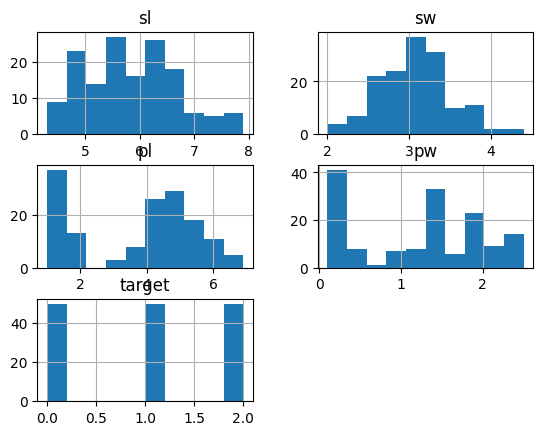

In [80]:
df.hist()
plt.show()

<Axes: >

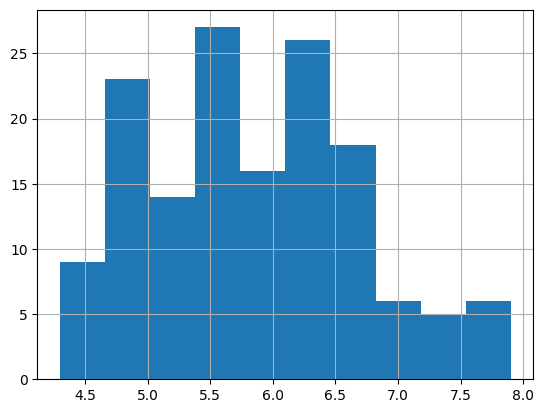

In [81]:
df['sl'].hist()

In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [29]:


rs = RobustScaler()

In [85]:
ss = StandardScaler()
data = df['sl'].values.reshape(-1,1)
ss.fit(data)
df['sl_ss'] = ss.transform(data)
df.head()


,sl,sw,pl,pw,target,sl_ss
0,5.1,3.5,1.4,0.2,0,-0.900681
1,4.9,3.0,1.4,0.2,0,-1.143017
2,4.7,3.2,1.3,0.2,0,-1.385353
3,4.6,3.1,1.5,0.2,0,-1.506521
4,5.0,3.6,1.4,0.2,0,-1.021849


In [89]:
mm = MinMaxScaler()
data = df['sl'].values.reshape(-1,1)
mm.fit(data)
df['sl_mm'] = ss.transform(data)
df.head()

,sl,sw,pl,pw,target,sl_ss,sl_mm
0,5.1,3.5,1.4,0.2,0,-0.900681,-0.900681
1,4.9,3.0,1.4,0.2,0,-1.143017,-1.143017
2,4.7,3.2,1.3,0.2,0,-1.385353,-1.385353
3,4.6,3.1,1.5,0.2,0,-1.506521,-1.506521
4,5.0,3.6,1.4,0.2,0,-1.021849,-1.021849


In [90]:
df.describe()

,sl,sw,pl,pw,target,sl_ss,sl_mm
count,150.000000,150.000000,150.000000,150.000000,150.000000,1.500000e+02,1.500000e+02
mean,5.843333,3.057333,3.758000,1.199333,1.000000,-4.736952e-16,-4.736952e-16
std,0.828066,0.435866,1.765298,0.762238,0.819232,1.003350e+00,1.003350e+00
min,4.300000,2.000000,1.000000,0.100000,0.000000,-1.870024e+00,-1.870024e+00
25%,5.100000,2.800000,1.600000,0.300000,0.000000,-9.006812e-01,-9.006812e-01
50%,5.800000,3.000000,4.350000,1.300000,1.000000,-5.250608e-02,-5.250608e-02
75%,6.400000,3.300000,5.100000,1.800000,2.000000,6.745011e-01,6.745011e-01
max,7.900000,4.400000,6.900000,2.500000,2.000000,2.492019e+00,2.492019e+00


In [91]:
from sklearn.model_selection import train_test_split

In [92]:
train, test = train_test_split(df, test_size=.2)
train.shape, test.shape

((120, 7), (30, 7))

In [95]:
train = pd.DataFrame(data= range(0, 11))
train

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [96]:
test = pd.DataFrame(data= range(1, 6))
test

,0
0,1
1,2
2,3
3,4
4,5
